# Setup

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

# Functions

In [92]:
def visualize (run_folder: str):
    run_folder_path = os.path.abspath('../records/' + run_folder)
    
    infected = []
    hospitalised = []
    dead = []
    
    for folder_name in os.listdir(run_folder_path):
        folder_path = os.path.join(run_folder_path, folder_name)
        
        if os.path.isfile(folder_path) or folder_name == 'output.log':
            continue
        
        match = re.match(r'oneoff_\((\d+)\,\s\d+\.\d+\)', folder_name)
        
        totals_df = pd.read_csv(os.path.join(folder_path, 'totals.csv'))
        
        infected.append((int(match.groups()[0]), totals_df.iloc[-1]['Infected'] * 100))
        hospitalised.append((int(match.groups()[0]), totals_df.iloc[-1]['Hospitalised'] * 100))
        dead.append((int(match.groups()[0]), totals_df.iloc[-1]['Dead'] * 100))
        
    infected.sort()
    hospitalised.sort()
    dead.sort()
    
    plt.plot([x for (x, y) in infected], [y for (x, y) in infected], color='red')
    plt.plot([x for (x, y) in hospitalised], [y for (x, y) in hospitalised], color='green')
    plt.plot([x for (x, y) in dead], [y for (x, y) in dead], color='blue')
    
    plt.show()

# One off vaccination: 50%

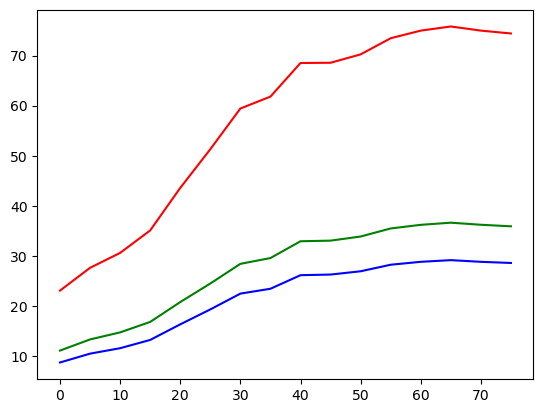

In [98]:
visualize('oneoff_50_1')

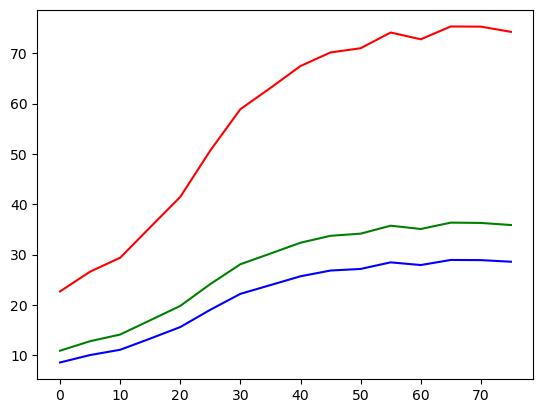

In [97]:
visualize('oneoff_50_2')

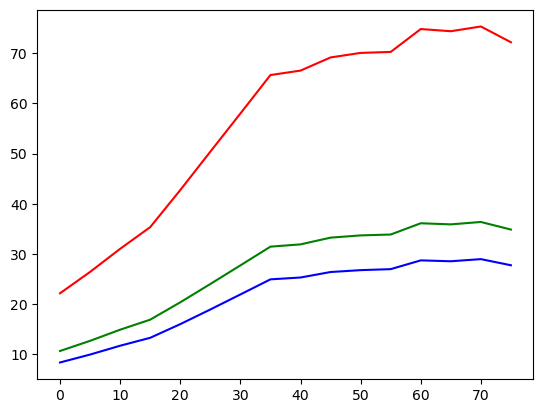

In [96]:
visualize('oneoff_50_3')